In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [43]:
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spend=('Price', 'sum'),
    num_purchases=('ProductID', 'count')
).reset_index()


In [44]:
# Merge the customer data and transaction data
df = pd.merge(customers, customer_transactions, on='CustomerID')


In [45]:
# Metrics for clustering
df_clustering = df[['total_spend', 'num_purchases']]

In [46]:
# Scale the metrics
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [47]:
# Using KMeans clustering (using 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate the Davies-Bouldin Index

In [49]:
db_index = davies_bouldin_score(df_scaled, df['Cluster'])

# Print DB Index value
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6714231226149178


In [50]:
# other metrics
# Inertia (Within-cluster sum of squares)
inertia = kmeans.inertia_

# Silhouette Score
sil_score = silhouette_score(df_scaled, kmeans.labels_)

# Print the metrics
print(f'Inertia (within-cluster sum of squares): {inertia}')
print(f'Silhouette Score: {sil_score}')

Inertia (within-cluster sum of squares): 83.74970828361003
Silhouette Score: 0.471937202644123


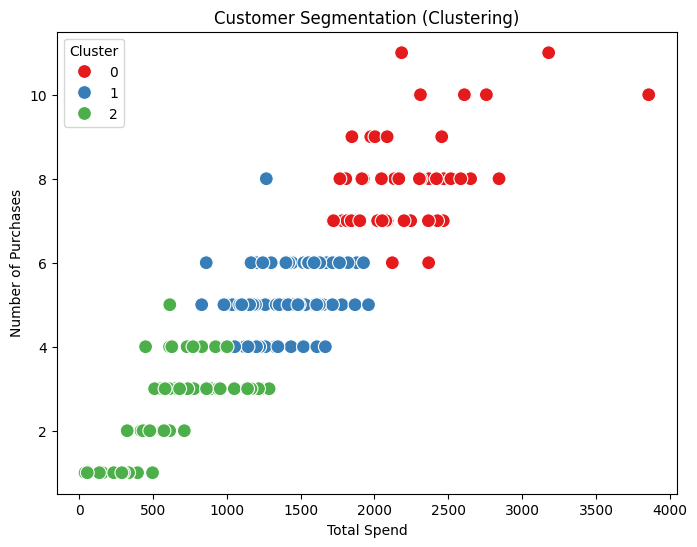

In [51]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_spend'], y=df['num_purchases'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation (Clustering)')
plt.xlabel('Total Spend')
plt.ylabel('Number of Purchases')
plt.show()